# Introdução

Este notebook procura adaptar a introdução ao LSD para o pacote mesa.

## Importando pacotes

In [1]:
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector
from mesa.batchrunner import BatchRunner

/home/gpetrini/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Modelo linear

## Objetivo

Para se familiarizar, será simulado um modelo bastante simples:

$$
X_t = X_{t-1} + m
$$
equivalente à

$$
\Delta X = m
$$

## Construindo classes

In [28]:
class BaseAgent(Agent):
    """ An agent with an ID and some initial conditions."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.m = 10
        self.x__1 = 1 
        self.x = self.x__1 + self.m

    def step(self): # The agent's step will go here.
        if self.m < 0:
            return
        other_agent = self.random.choice(self.model.schedule.agents)
        other_agent.x += self.m
        pass

class BaseModel(Model):
    """A model with some number of agents."""
    def __init__(self, N):
        self.num_agents = N
        self.schedule = RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = BaseAgent(i, self)
            self.schedule.add(a)

    def step(self):
        '''Advance the model by one step.'''
        self.schedule.step()

## Simulando

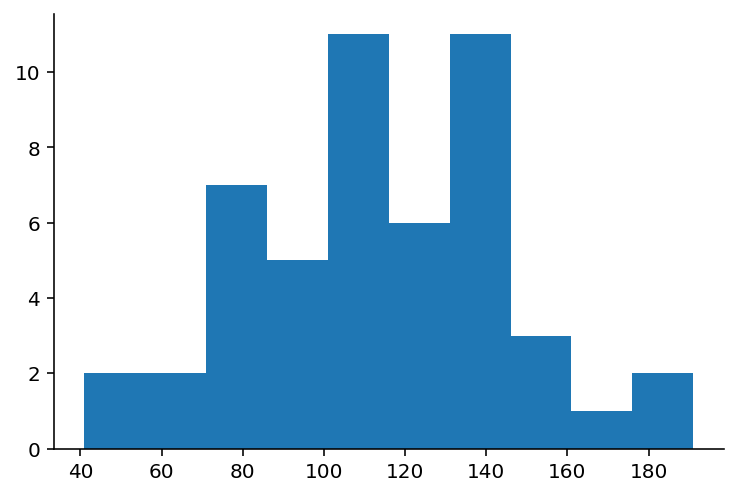

In [34]:
model = BaseModel(50)
for i in range(10):
    model.step()
    
result = [a.x for a in model.schedule.agents]
plt.hist(result)
sns.despine()
plt.show()

# Bibliografia e links úteis

VALENTE, M. LSD Manual. www.labsimdev.org, 2016.